In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("datasets/dynamic_pricing.csv")

In [4]:
(data.head())


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [5]:
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values_report = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})
print(missing_values_report)

                         Missing Values Data Type
Number_of_Riders                      0     int64
Number_of_Drivers                     0     int64
Location_Category                     0    object
Customer_Loyalty_Status               0    object
Number_of_Past_Rides                  0     int64
Average_Ratings                       0   float64
Time_of_Booking                       0    object
Vehicle_Type                          0    object
Expected_Ride_Duration                0     int64
Historical_Cost_of_Ride               0   float64


## Univariate Analysis
Univariate analysis focuses on analyzing a single variable or feature at a time

In [7]:
# define the numerical and categorical columns
numerical_cols = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
                  'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']


In [9]:
descriptive_stats = data[numerical_cols].describe()
descriptive_stats

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


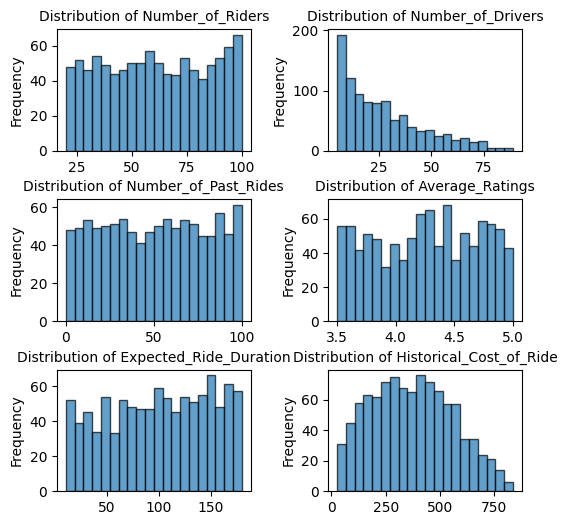

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(numerical_cols):
    ax = axes[i//2, i%2]
    ax.hist(data[col], bins=20, edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribution of {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

plt.show()

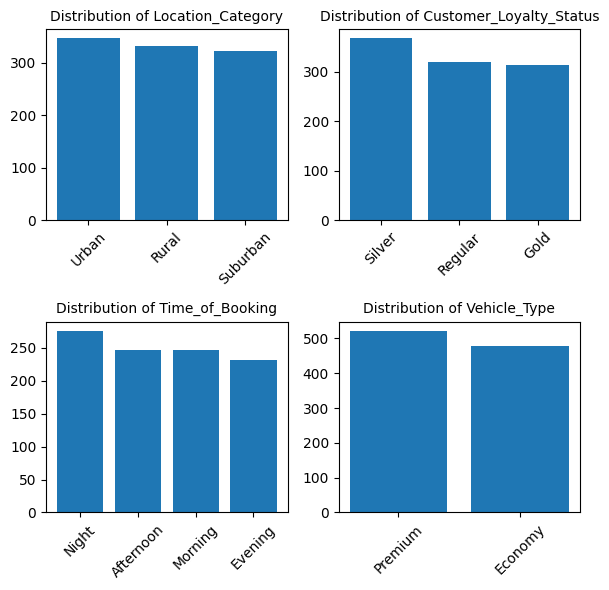

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# loop through categorical columns and plot count plots
for i, col in enumerate(categorical_cols):
    ax = axes[i//2, i%2]
    categories = data[col].value_counts() # returns series object

    ax.bar(categories.index, categories.values)
    ax.set_title(f'Distribution of {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)  # rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

### Bivariate Analysis



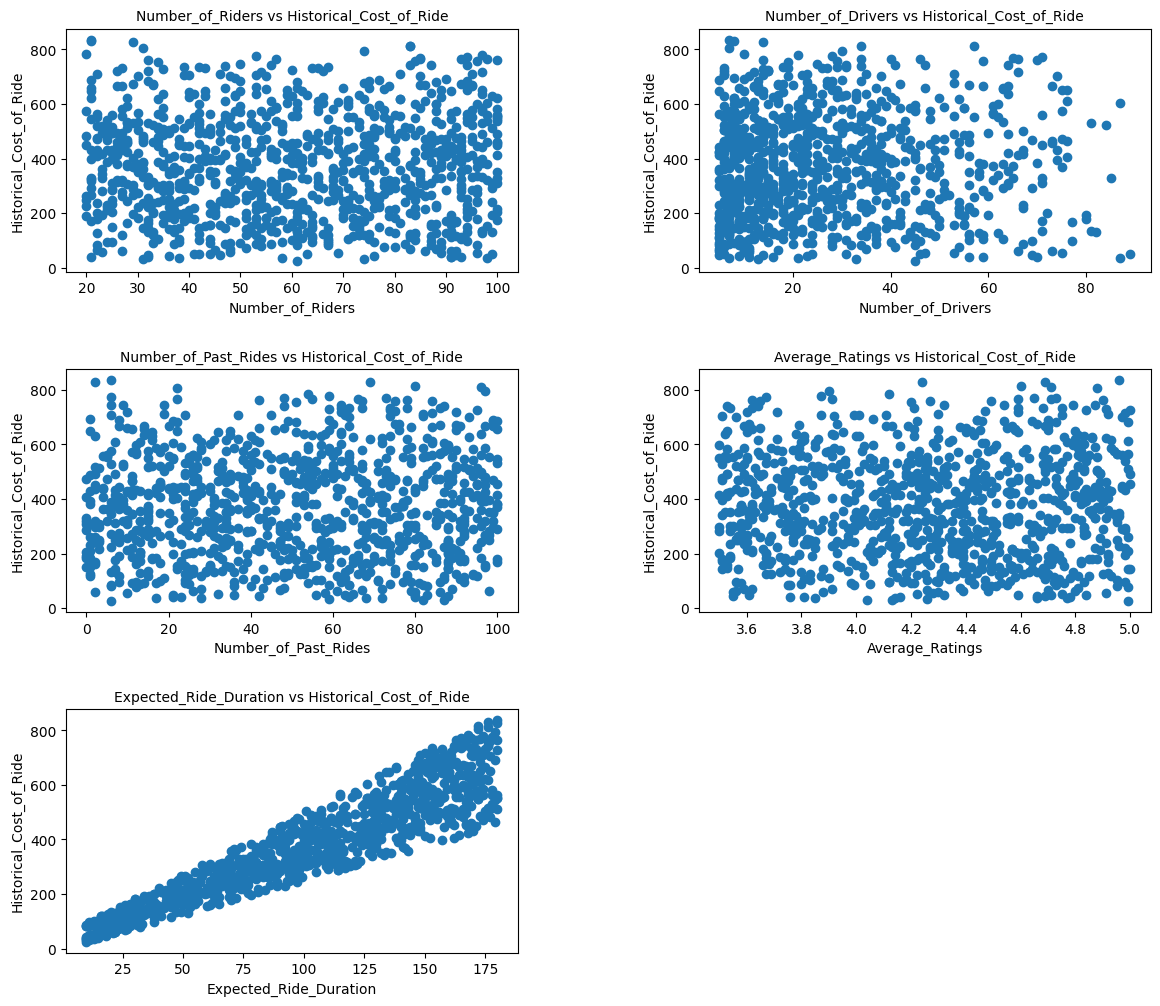

In [36]:
num_plots = len(numerical_cols[:-1])
n_cols = 2
n_rows = (num_plots + 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:-1]):
    ax = axes[i]
    ax.scatter(data[col], data['Historical_Cost_of_Ride'])
    ax.set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
    ax.set_xlabel(col)
    ax.set_ylabel('Historical_Cost_of_Ride')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])
